# Development of regression model to predict car prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size ch

In [2]:
df_cars_raw = pd.read_csv('cars.csv',sep=';',index_col=0)

In [5]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">href</a>'.format(val)

def df_with_href(df):
    return df.style.format({'href': make_clickable})

In [6]:
df_cars_raw.describe()

,Miltal,Modellår,Tillverkningsår,price
count,677.000000,677.000000,677.000000,677.000000
mean,9052.548744,2012.415066,2012.161004,94475.002954
std,8282.297069,4.970083,4.925998,62182.288936
min,0.000000,1997.000000,1997.000000,2500.000000
25%,700.000000,2010.000000,2009.000000,44900.000000
50%,7810.000000,2013.000000,2013.000000,87375.000000
75%,14700.000000,2017.000000,2016.000000,149000.000000
max,77123.000000,2018.000000,2018.000000,419000.000000


In [7]:
index = ((df_cars_raw['Miltal'] < 50000) & 
         (df_cars_raw['Miltal'] > 1000) & 
         (df_cars_raw['price'] > 2000))
df_cars = df_cars_raw.loc[index].copy()

In [8]:
df_cars.describe()

,Miltal,Modellår,Tillverkningsår,price
count,503.000000,503.000000,503.000000,503.000000
mean,12017.355865,2010.590457,2010.320080,68192.165010
std,6806.442660,4.483177,4.382478,45114.299259
min,1100.000000,1997.000000,1997.000000,2500.000000
25%,6600.000000,2008.000000,2008.000000,30750.000000
50%,11227.000000,2012.000000,2012.000000,64000.000000
75%,16648.000000,2014.000000,2014.000000,99000.000000
max,32499.500000,2018.000000,2017.000000,279000.000000


/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


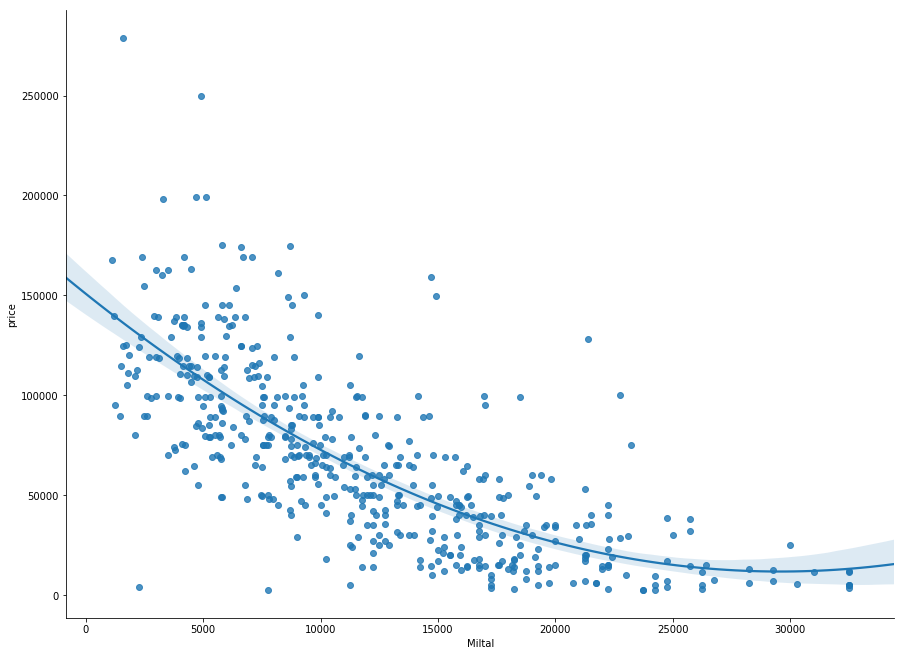

In [9]:
a = sns.lmplot(x="Miltal", y="price", data=df_cars,order=2)
a.fig.set_size_inches(15,10)

In [10]:
linear_regression = LinearRegression()

In [11]:
y = df_cars['price']
feature_colums = ['Miltal','Modellår','Tillverkningsår']
X = df_cars[feature_colums]

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


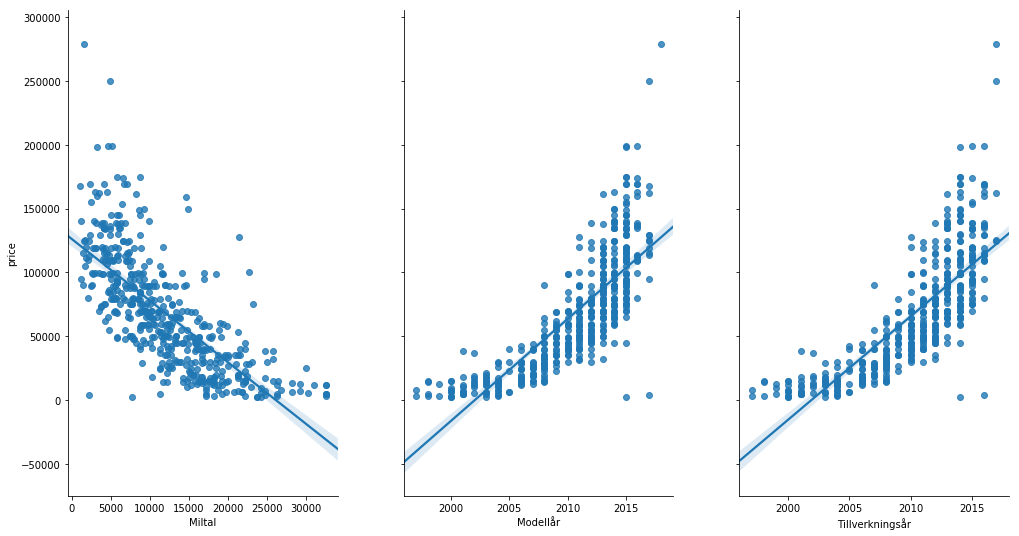

In [12]:
a = sns.pairplot(data = df_cars,x_vars = feature_colums,y_vars=['price'],kind = 'reg',)
a.fig.set_size_inches(15,10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_regression)

r2s = []
for i in range(20):

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.7428810388835524

In [15]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [16]:
pickle.dump(model, open('model.pkl', 'wb'))

In [17]:
df_cars['predicted price'] = model.predict(df_cars[feature_colums])
df_cars['price rating'] = df_cars['price'] / df_cars['predicted price']

In [18]:
df_with_href(df_cars.sort_values(by = 'price rating'))

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
79511391,Bensin,22249.5,1999,2000,Manuell,berlingo,Citroën Berlingo family -99,href,Västernorrland,3000,-458.435,-6.544
80433218,Diesel,7749.5,2015,2014,Manuell,caddy,"VW Caddy life 5 sitsig, ev Leasingöverlåtelse -15",href,Uppsala,2581,109196,0.0236363
80733755,Diesel,2249.5,2017,2016,Manuell,berlingo,Citroën Berlingo 4X4 dangel -17,href,Östergötland,4125,149481,0.0275955
80426876,Bensin,11249.5,2004,2004,Manuell,berlingo,Citroën Berlingo Family -04,href,Västernorrland,5000,24550.8,0.203659
80613134,Bensin,18249.5,2004,2004,Manuell,berlingo,Citroen berlingo 04 -04,href,Malmö,3000,13953.5,0.214999
80836337,Diesel,32499.5,1998,1998,Manuell,berlingo,"Reservdelsbil Berlingo skåp 1,8 deisel -98",href,Östergötland,3500,13582.4,0.257687
80410345,Diesel,26249.5,1997,1997,Manuell,berlingo,Citroën Berlingo -97,href,Västernorrland,3000,11388.8,0.263418
80887193,Bensin,24249.5,2003,2003,Manuell,berlingo,Citroen berlingo -03,href,Södermanland,2500,8673.28,0.288242
80103428,Bensin,17249.5,2000,2000,Manuell,berlingo,Citroen berlingo family rep. Objekt -00,href,Kalmar,3500,10752.8,0.325496
80911462,Diesel,19249.5,2003,2001,Manuell,berlingo,Berlingo -03,href,Gävleborg,5000,14081.2,0.355083


In [19]:
index = df_cars['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_cars.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,kangoo,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,33278.123742,1.35224


In [20]:
df_cars['car type'].unique()

array(['berlingo', 'caddy', 'kangoo'], dtype=object)

In [21]:
degree = 2
kangoo_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
index = df_cars['car type'] == 'kangoo'
df_kangoo = df_cars.loc[index].copy()

r2s = []
for i in range(20):

    kangoo_model.fit(X_train, y_train)
    y_predict = kangoo_model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)


0.7428810388835524

In [22]:
kangoo_model.fit(df_kangoo[feature_colums],df_kangoo['price'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [23]:
df_kangoo['predicted price'] = model.predict(df_kangoo[feature_colums])
df_kangoo['price rating'] = df_kangoo['price'] / df_kangoo['predicted price']
df_with_href(df_kangoo.sort_values(by = 'price rating'))

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80900137,Bensin,14723,2006,2006,Manuell,kangoo,Renault Kangoo 1.6 95hk -06,href,Älvsborg,14800,25014.7,0.591652
80818741,Bensin,17551,2006,2006,Manuell,kangoo,Renault Kangoo 1.6 M-VÄRM 5-SITS DRAG -06,href,Stockholm,14900,21369.8,0.697247
80783111,Bensin,17249.5,2000,2000,Manuell,kangoo,"RENAULT Kangoo 1,4 SNABB AFFÄR 8000 KR -00",href,Östergötland,8000,10752.8,0.743992
77656999,Diesel,12000,2009,2009,Manuell,kangoo,Renault Kangoo 1.5 DCI Skåp / Nybesiktigad -09,href,Södermanland,34900,45376.8,0.769116
80934421,Diesel,32499.5,2003,2002,Manuell,kangoo,Renault kangoo -03,href,Halland,11500,14107.8,0.815152
80696920,El,1441,2013,2013,Automat,kangoo,Renault Kangoo Express Maxi II Z.E. Aut -13,href,Kristianstad,89900,105600,0.851324
79745147,Diesel,8998,2013,2012,Manuell,kangoo,Renault Kangoo II 1.5 dCi FAP (110hk) Style 5 -13,href,Uppsala,74900,86160,0.869313
80603429,Bensin,6800,2009,2008,Manuell,kangoo,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,href,Göteborg,54900,62039.5,0.88492
80281611,Bensin,19249.5,2001,2000,Manuell,kangoo,Renault Kangoo -01,href,Kronoberg,11900,12968.4,0.917614
80896861,Diesel,2100,2014,2014,Manuell,kangoo,Renault Kangoo II Kombi phII dCi 90FAP S/S St -14,href,Dalarna,109500,113056,0.968544


In [24]:
index = df_kangoo['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_kangoo.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,kangoo,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,33278.123742,1.35224


In [25]:
index = df_kangoo['header'] == 'Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09'
df_kangoo.loc[index]



,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,car type,header,href,place,price,predicted price,price rating
80603429,Bensin,6800.0,2009.0,2008.0,Manuell,kangoo,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,54900.0,62039.476902,0.88492
